In [3]:
import tensorflow as tf
from tensorflow import keras
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image


print('JALO')

JALO


Found 526 files belonging to 3 classes.


2023-04-17 10:53:02.602130: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-17 10:53:02.603096: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-04-17 10:53:02.644546: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75497472 exceeds 10% of free system memory.
2023-04-17 10:53:02.663484: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75497472 exceeds 10% of free sys

['Healthy', 'armyworm', 'leaf_blight']


2023-04-17 10:53:06.461006: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [526]
	 [[{{node Placeholder/_0}}]]
2023-04-17 10:53:06.461247: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [526]
	 [[{{node Placeholder/_0}}]]


17/17 [==============================] - 0s 9ms/step
Total de imágenes:  6


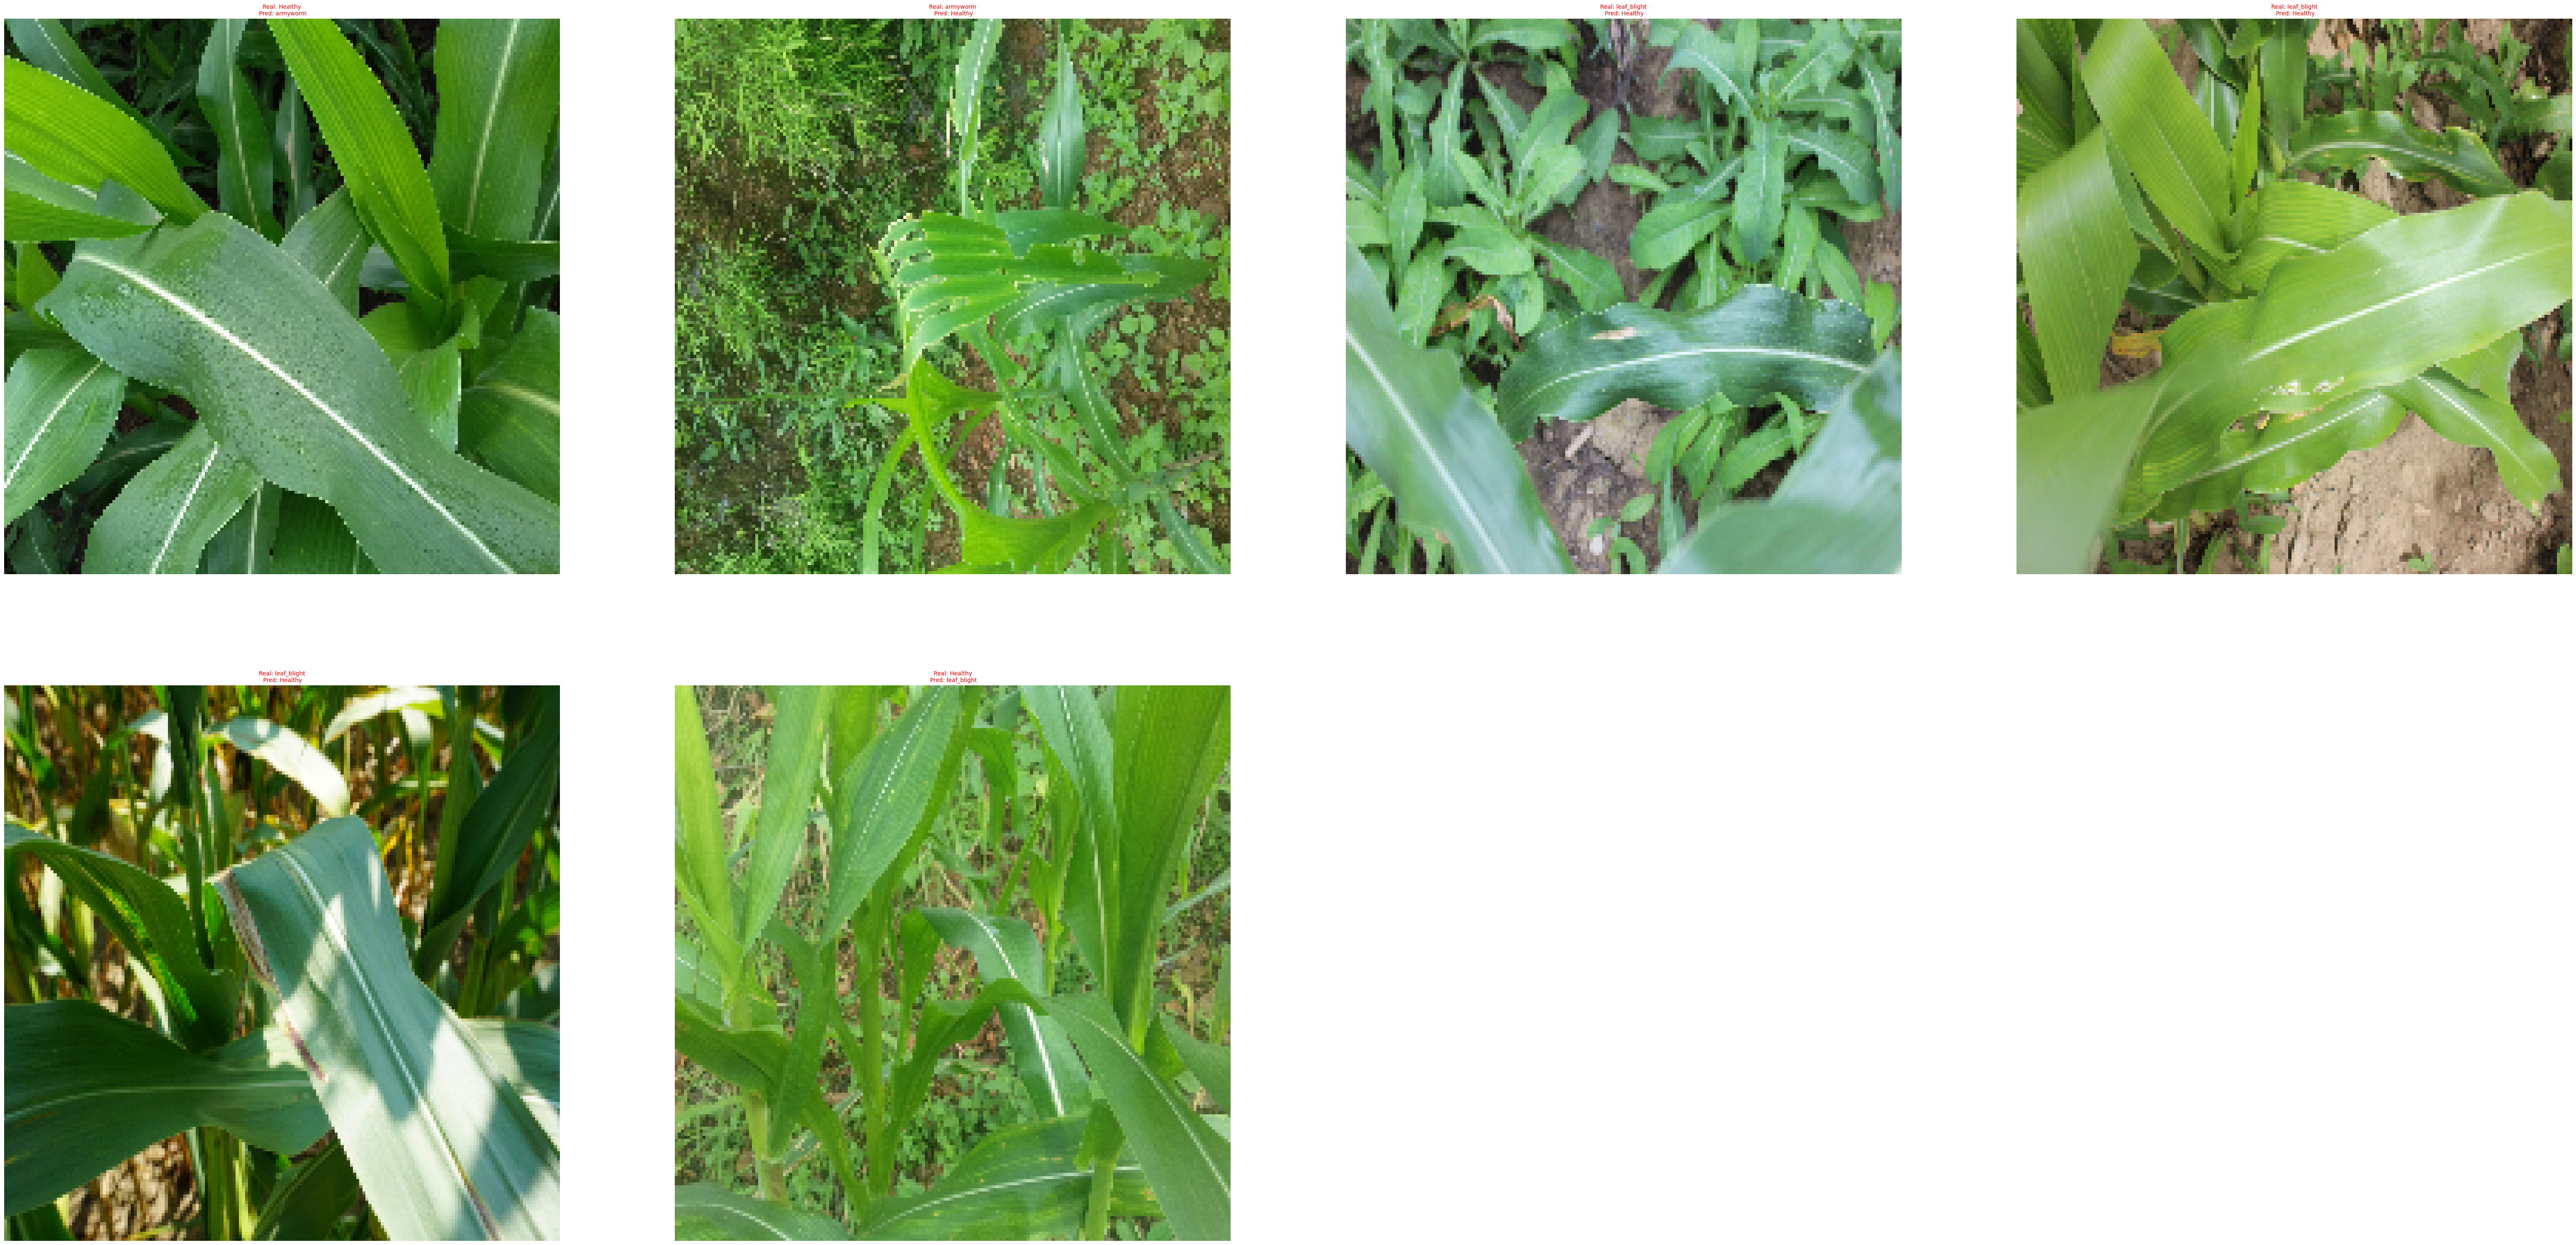

In [4]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    all_images = []
    #conv_base = keras.applications.vgg16.VGG16(weights ="imagenet", include_top = False, input_shape = (180, 180, 3))
    conv_base = keras.applications.resnet50.ResNet50(weights ="imagenet", include_top = False, input_shape = (180, 180, 3))
    for images, labels in dataset:
        #preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        preprocessed_images = keras.applications.resnet50.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
        for im in images:
            all_images.append(im)
    return all_images, np.concatenate(all_features), np.concatenate(all_labels)
    
def With_Transfer(test_dataset):
    images, features, labels = get_features_and_labels(test_dataset)
    preds = model.predict(features)
    pred = tf.argmax(preds, axis = 1)
    for i in range( len(pred) ):
        if int(pred[i]) != int(labels[i]):
            failed_images.append( [ images[i], labels[i], pred[i] ] )

def Without_Transfer(test_dataset):
    for images, labels in test_dataset:
        preds = model.predict(images)
        pred = tf.argmax(preds, axis = 1)
        batch =  images.shape.as_list()
        for i in range(batch[0]):
            if int(labels[i]) != int(pred[i]):
                failed_images.append( [ images[i], labels[i], pred[i] ] )
    
def Plotting(results):
    for i,res in enumerate(results):
        try:
            ax = plt.subplot(4, 4, i + 1)
            plt.imshow(res[0].numpy().astype("uint8"))
            plt.title('Real: ' + class_names[res[1]] + '\n Pred: '+class_names[res[2]], size = 10, color = "red")
            plt.axis("off")
        except:
            break
    plt.show()
    
batch_size = 32 
image_w_h = 180
path_test = 'test'
failed_images = []
image_size = (image_w_h, image_w_h) # (180, 180)
test_dataset = image_dataset_from_directory(
    path_test,
    image_size = image_size,
    batch_size = batch_size) 

item = 4
#3 = VGG16 y 4=ResNet50
models = {1:'classifier80.41825294494629.h5', 2:'classifier94.86691951751709.h5', 3: 'classifierV297.33840227127075.h5', 4:'classifierV298.85931611061096.h5'}
model = tf.keras.models.load_model('Trained_models/'+models[item])
plt.figure(figsize=(80, 80))
class_names = test_dataset.class_names
print(class_names)

if item < 3:
    Without_Transfer(test_dataset)
else:
    With_Transfer(test_dataset)
#Plotting(images, labels, preds)
print('Total de imágenes: ', len(failed_images))
Plotting(failed_images)

In [ ]:

print("HOLA A TODOSssss")